In [1]:
import nglview as ng
import matplotlib.pyplot as plt
import numpy as np

In [2]:
cd results

/mnt/e/WSL/gmx/results


In [ ]:
!printf "4\n4\n" | gmx rms -s ethanol/input/em.tpr -f ethanol/input/md_noPBC.xtc -o ethanol/rmsd_xray.xvg -tu ns -xvg none

In [ ]:
time,rmsd = np.loadtxt("ethanol/rmsd_xray.xvg", comments=["@", "#"], unpack=True)

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.fill_between(time[75:],rmsd[75:], color="green", linestyle="-", alpha=0.3)

ax.plot(time,rmsd, color="black", linestyle="-")
ax.set_xlabel("Time (ns)")
ax.set_ylabel(r"C$_\alpha$ RMSD (nm)")

plt.title('Ethanol\n' + 'Backbone after lst sq fit to backbone', fontsize = 10)
plt.savefig("rmsd_Ethanol.png", format="png", dpi=600)
plt.show()

In [ ]:
!echo "1" | gmx gyrate -f ethanol/input/md_noPBC.xtc -s ethanol/input/md.tpr -o ethanol/gyrate.xvg -xvg none

In [ ]:
time, gyration, xaxis, yaxis, zaxis = np.loadtxt("ethanol/gyrate.xvg", comments=["@", "#"], unpack=True)

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)

ax.plot(time,gyration, color="black", linestyle="-")
ax.set_xlabel("Time (ps)")
ax.set_ylabel("Rg (nm)")

plt.title('Ethanol')
plt.savefig("gyration_Ethanol.png", format="png", dpi=600)
plt.show()

In [ ]:
!printf "1\n4\n" | gmx trjconv -s ethanol/input/md.tpr -f ethanol/input/md_noPBC.xtc -o ethanol/input/backbone_center.xtc -center -pbc mol

In [ ]:
!printf "4\n4\n" | gmx cluster -f ethanol/input/md_noPBC.xtc -s ethanol/input/md.tpr -cl ethanol/central.pdb -b 750

In [ ]:
!printf "4\n" | gmx rmsf -f ethanol/input/backbone_center.xtc -s ethanol/central -o ethanol/rmsf.xvg -res -b 750

In [ ]:
res,rmsf = np.loadtxt("ethanol/rmsf.xvg", comments=["@", "#"], unpack=True)

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.fill_between(res,rmsf, color="black", linestyle="-", alpha=0.3)

ax.plot(res,rmsf, color="black", linestyle="-")
ax.set_xlabel("residue")
ax.set_ylabel(r"C$_\alpha$ RMSF (nm)")

plt.title('Ethanol')
plt.savefig("rmsf_Ethanol.png", format="png", dpi=600)
plt.show()

In [11]:
!printf "1\n" | gmx msd -f ethanol/input/md_noPBC.xtc -s ethanol/input/md.tpr -o ethanol/msd.xvg -beginfit 400  -endfit 700

                        :-) GROMACS - gmx msd, 2023 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /mnt/e/WSL/gmx/results
Command line:
  gmx msd -f ethanol/input/md_noPBC.xtc -s ethanol/input/md.tpr -o ethanol/msd.xvg -beginfit 400 -endfit 700

Reading file ethanol/input/md.tpr, VERSION 2023 (single precision)
Reading file ethanol/input/md.tpr, VERSION 2023 (single precision)
Last frame        100 time 1000.000   
Analyzed 101 frames, last time 1000.000

Back Off! I just backed up ethanol/msd.xvg to ethanol/#msd.xvg.4#

GROMACS reminds you: "Would You Like to Be the Monster Tonight ?" (Captain Beefheart)



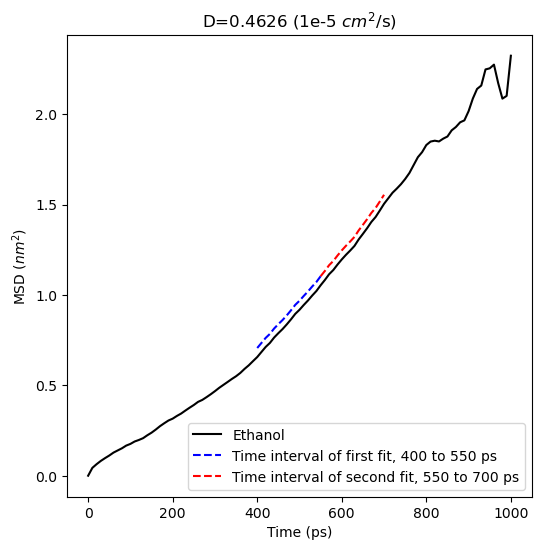

In [14]:
time,msd = np.loadtxt("ethanol/msd.xvg", comments=["@", "#"], unpack=True)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)

ax.plot(time,msd, color="black", linestyle="-", label="Ethanol")
ax.set_xlabel("Time (ps)")
ax.set_ylabel("MSD ($nm^2$)")

time_part1 = time[40:56]
msd_part1 = msd[40:56]+0.05
ax.plot(time_part1,msd_part1, color="blue", linestyle="--", label="Time interval of first fit, 400 to 550 ps")

time_part2 = time[55:71]
msd_part2 = msd[55:71]+0.05
ax.plot(time_part2,msd_part2, color="red", linestyle="--", label="Time interval of second fit, 550 to 700 ps")

plt.title('D=0.4626 (1e-5 $cm^2$/s)') #found in the msd.xvg file
plt.legend(loc='lower right')
plt.savefig("MSD_Ethanol.png", format="png", dpi=600)
plt.show()

In [ ]:
!printf "1\n" | gmx sasa -f ethanol/input/md_noPBC.xtc -s ethanol/input/md.tpr -o ethanol/area.xvg -or ethanol/area_res.xvg -b 750

In [ ]:
res,area = np.loadtxt("ethanol/area.xvg", comments=["@", "#"], unpack=True)

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.fill_between(res,area,y2=233, color="blue", linestyle="-", alpha=0.3)

ax.plot(res,area, color="black", linestyle="-")
ax.set_xlabel("Time (ps)")
ax.set_ylabel("Solvent Accessible Surface Area ($nm^2$)")

plt.title('Ethanol')
plt.savefig("SASA_Ethanol.png", format="png", dpi=600)
plt.show()

In [ ]:
res,area,standdev = np.loadtxt("ethanol/area_res.xvg", comments=["@", "#"], unpack=True)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.fill_between(res,area, color="blue", linestyle="-", alpha=0.3)

ax.plot(res,area, color="black", linestyle="-")
ax.set_xlabel("Residue")
ax.set_ylabel("Solvent Accessible Surface Area ($nm^2$)")

ax.plot(res,standdev, color="red", linestyle="-")
ax.fill_between(res,standdev, color="red", linestyle="-", alpha=0.3)

plt.title('Ethanol')
plt.savefig("SASA_Res_Ethanol.png", format="png", dpi=600)
plt.show()